# Visualization of dominant modes of variability in 3D human faces.


The objective in the notebook is to analyse synthetic 3D human faces data using eigenfaces. Visualize the dominant modes of variability i.e. eigenfaces corresponding to highest eigenvalue and also generate faces varying magnitude for each of the eigenfaces combining factor.   

 * [Data Preprocessing](#data_preprocessing)

 * [Eigenfaces](#eigenfaces)

 * [Average Face](#avg_face)
 
 * [Dominant Modes of Shape Variation](#shape_variation)
 
 * [Conclusion](#conclusion)
 
 * [References](#references)
 


In [1]:
import sys
import os

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_eigenfaces.html
from sklearn.decomposition import PCA

datapath = 'Synthetic500'
datapath_split = 'Synthetic500_split'
ext = '.obj'

## Data Preprocessing
<a id='data_preprocessing'></a>

 * The 3D coordinates of each face is picked and saved separately.

In [2]:
files = [f for f in os.listdir(datapath) if ext == os.path.splitext(f.lower())[-1]]

In [3]:
if not os.path.exists(datapath_split):
    os.mkdir(datapath_split)
    print(f'[Created] {datapath_split}.')
else:
    print(f'[Dir] {datapath_split} already exists.')
    

[Dir] Synthetic500_split already exists.


In [4]:
import time

def save_data(path, data, cols=None):
    df = pd.DataFrame(data, index=None, columns=cols)
    df.to_csv(path, index=False)
    
for f in files:
    f_path = os.path.join(datapath, f)
    i = 0
    # print(f_path)
    with open(f_path, 'r') as fopen:
        lines = fopen.readlines()
        
        root_name, ext = os.path.splitext(f)
        v3d = []; v3d_cols = ['x', 'y', 'z']; v3d_path = os.path.join(datapath_split, root_name + '_v.csv')
        vt2d = []; vt2d_cols = ['x', 'y']; vt2d_path = os.path.join(datapath_split, root_name + '_vt.csv')
        f3d = []; f3d_cols = ['x', 'y', 'z']; f3d_path = os.path.join(datapath_split, root_name + '_f.csv')
        for line in lines:
            line = line.strip().lower()
            if line.startswith('v '):
                line = line[2:].split()
                v3d.append(line)
            elif line.startswith('vt '):
                line = line[3:].split()
                vt2d.append(line)
            elif line.startswith('f '):
                line = line[2:].split()
                f3d.append(line)
#             print(f'v3d_len = {len(v3d)}, vt2d_len={len(vt2d)}, f3d_len={len(f3d)}')
        save_data(v3d_path, v3d, v3d_cols)
        save_data(vt2d_path, vt2d, vt2d_cols)
        save_data(f3d_path, f3d, f3d_cols)

In [5]:
v3d_files = [f for f in os.listdir(datapath_split) if f.endswith('_v.csv')]
vt2d_files = [f for f in os.listdir(datapath_split) if f.endswith('_vt.csv')]
f3d_files = [f for f in os.listdir(datapath_split) if f.endswith('_f.csv')]

In [6]:
for f in v3d_files:
    df = pd.read_csv(os.path.join(datapath_split, f))
    # print(f'file = {f}, shape = {df.values.shape}') # All has shape (7160, 3)

In [7]:
for f in vt2d_files:
    df = pd.read_csv(os.path.join(datapath_split, f))
    # print(f'file = {f}, shape = {df.values.shape}') # All has shape (7160, 2)

In [8]:
for f in f3d_files:
    df = pd.read_csv(os.path.join(datapath_split, f))
    # print(f'file = {f}, shape = {df.values.shape}') # All has shape (14050, 3) # 7160 * 2 = 14320

In [9]:
7160 * 2

14320

In [10]:
df_v3d = pd.read_csv(os.path.join(datapath_split, v3d_files[0]))
df_vt2d = pd.read_csv(os.path.join(datapath_split, vt2d_files[0]))
df_f3d = pd.read_csv(os.path.join(datapath_split, f3d_files[0]))

In [11]:
import random
v3d_ids = list(range(7160))
random.shuffle(v3d_ids)

In [12]:
n = 200
v3d_ids_tr = v3d_ids[:n]

In [13]:

vals_v3d = df_v3d.values
x, y, z = vals_v3d[:, 0], vals_v3d[:, 1], vals_v3d[:, 2]

x_v3d, y_v3d, z_v3d = vals_v3d[v3d_ids_tr, 0], vals_v3d[v3d_ids_tr, 1], vals_v3d[v3d_ids_tr, 2]

vals_vt2d = df_vt2d.values
x_vt2d, y_vt2d = vals_vt2d[:, 0], vals_vt2d[:, 1]

vals_f3d = df_f3d.values
x_f3d, y_f3d, z_f3d = vals_f3d[:, 0], vals_f3d[:, 1], vals_f3d[:, 2]

In [14]:
import itertools

colors = itertools.cycle(["r", "b", "g"])

In [15]:
random.shuffle(list(range(7160)))

## 3D Scatter Plot
<a id='plot_3d'> </a>

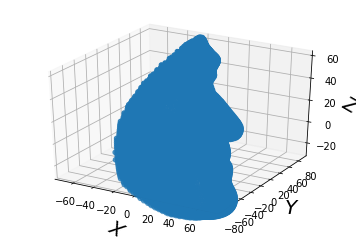

In [16]:
def plot_3d_coords(data, rand_sel=None):
    

        
    x, y, z = data[:, 0], data[:, 1], data[:, 2]
    if rand_sel is None:
        ids = list(range(7160))
        random.shuffle(ids)
        rand_sel = ids[:200]
        
    # x_r, y_r, z_r = x[rand_sel], y[rand_sel], z[rand_sel]
    
    
    fig = plt.figure()
    ax = plt.axes(projection="3d")

    # z_line = np.linspace(0, 15, 1000)
    # x_line = np.cos(z_line)
    # y_line = np.sin(z_line)
    # ax.plot3D(x, y, z, 'gray')

    # z_points = 15 * np.random.random(100)
    # x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
    # y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
    ax.scatter3D(x, y, z, zdir='x'); # ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
    # ax.scatter3D(x_r, y_r, z_r, zdir='x', c="limegreen");

    ax.set_xlabel('$X$', fontsize=20, rotation=150)
    ax.set_ylabel('$Y$', fontsize=20)
    ax.set_zlabel('$Z$', fontsize=20, rotation=150)

    plt.show()
plot_3d_coords(vals_v3d)

In [17]:
t = np.random.randn(3, 4)

In [18]:
x, y, z = t

In [19]:
x.shape

(4,)

In [20]:
def load_all_data(fnames):
    x_train = []
    for i, f in enumerate(fnames):
        # print(i)
        df = pd.read_csv(os.path.join(datapath_split, f))
        x_train.append(df.values)

    x_train_np = np.array(x_train)
    return x_train_np


x_train_np = load_all_data(v3d_files)
v3d_avg = x_train_np.mean(axis=0)

In [21]:
print(x_train_np.shape)
x_train_np.reshape(500, -1)[-1, -10:]

(500, 7160, 3)


array([-22.636986,  64.179777,   8.038101, -22.671603,  64.355921,
         9.914092, -22.633125,  64.510857,  11.796837, -22.659929])

(500, 7160, 3)

## Eigenfaces 
<a id='eigenfaces'> </a>

 * The 3D synthetic model of faces are used to get an eigen3Dmodel where at least 98% of variabilities are captured by the PCA model with merely maximum of 24 points out of 7160 points. 
 
 * It is important to point out here about the nature of the result because the data is synthetic- it is the reason for having such low principal components.  

In [22]:
def train_pcs_simultaneous(X, n_components=200):
    X = X.reshape(500, -1)
    pca = PCA(n_components=n_components, whiten=False)
    pca.fit(X)
    
    return pca

pca_v3d_98 = train_pcs_simultaneous(x_train_np, n_components=0.98) # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
pca_v3d_99 = train_pcs_simultaneous(x_train_np, n_components=0.99)




In [ ]:
# Check if inverse transform is almost equal

In [59]:
pca_v3d = train_pcs_simultaneous(x_train_np, n_components=0.999999)

In [66]:
t = pca_v3d.transform(x_train_np[0, :, :].reshape(1, -1))
t.shape

(1, 117)

In [68]:
pca_v3d.components_.shape, pca_v3d.mean_.shape

((117, 21480), (21480,))

In [73]:
(pca_v3d.mean_ + np.dot(pca_v3d.components_.T, t.reshape(-1))).reshape(-1, 3)

array([[-68.0706536 ,  11.25235081, -24.28154509],
       [-68.16532675,   9.43047928, -24.29731582],
       [-68.19586762,   7.6025855 , -24.37581539],
       ..., 
       [ 69.01270884,   7.45078997, -23.86956198],
       [ 68.98611385,   9.30954587, -23.73064914],
       [ 68.89524078,  11.16550906, -23.64294261]])

In [95]:
x_train_np[0, :, :]

array([[-68.070653,  11.252351, -24.281545],
       [-68.165327,   9.430479, -24.297316],
       [-68.195868,   7.602585, -24.375815],
       ..., 
       [ 69.012709,   7.45079 , -23.869562],
       [ 68.986114,   9.309546, -23.730649],
       [ 68.895241,  11.165509, -23.642943]])

In [79]:
import numpy.testing as npt
# npt.assert_almost_equal(x_train_np[0, :, :].reshape(-1), (pca_v3d.mean_ + np.dot(pca_v3d.components_.T, t.reshape(-1))), 6)

## Variability captured by respective eigenvectors of each coordinates in descending order.  

In [23]:
print('[pca_v3d_98]\nVariabiltiy Ratio')
print(pca_v3d_98.explained_variance_ratio_)
print(pca_v3d_98.explained_variance_ratio_.shape)

print('\n\n[pca_v3d_99]\nVariabiltiy Ratio')
print(pca_v3d_99.explained_variance_ratio_)
print(pca_v3d_99.explained_variance_ratio_.shape)
    

[pca_v3d_98]
Variabiltiy Ratio
[ 0.55801177  0.12600075  0.07238598  0.03971638  0.02968164  0.02050471
  0.01980361  0.01325789  0.01235183  0.00853764  0.00793912  0.00726685
  0.00707893  0.00560843  0.00510141  0.00471125  0.00416291  0.00390617
  0.00369225  0.00357206  0.00279896  0.00256331  0.00243931  0.00217122
  0.0018568   0.00172663  0.00164909  0.00159994  0.00140163  0.00132276
  0.00123757  0.00112678  0.00101836  0.0009768   0.00096561  0.00091805
  0.00083629  0.00081002]
(38,)


[pca_v3d_99]
Variabiltiy Ratio
[  5.58011770e-01   1.26000753e-01   7.23859767e-02   3.97163819e-02
   2.96816357e-02   2.05047051e-02   1.98036147e-02   1.32578877e-02
   1.23518269e-02   8.53764254e-03   7.93912450e-03   7.26685404e-03
   7.07892837e-03   5.60843113e-03   5.10141273e-03   4.71124623e-03
   4.16290694e-03   3.90616712e-03   3.69225227e-03   3.57206473e-03
   2.79895867e-03   2.56330983e-03   2.43930560e-03   2.17121581e-03
   1.85679921e-03   1.72662692e-03   1.64908785e-03 

In [24]:
pca_v3d_98.components_.shape

(38, 21480)

## Transform Data

In [25]:
def get_transformed_data(pca, data, add_mean=True):
    assert data.shape[-1] in [2, 3], 'Last dimension must be co-ordinates'
    
    # Input is 2D
    if data.ndim == 1:
        data = np.expand_dims(data, axis=0)
    
    # num_cds = data.ndim
    
    data = data.reshape(data.shape[0], -1)
    
    pca_trf = pca.transform(data) # batch * num_feature
    if add_mean:
        # np.dot((500, 38), (38, 21480)) make (500, 21480) i.e (500, 7160*3)
        pca_trf_recover = pca.mean_ + np.dot(pca_trf, pca.components_) #  (500, 21480)
    else:
        pca_trf_recover = np.dot(pca_trf, pca.components_) # (500, 21480)
        
    
    pca_trf = pca_trf #.transpose(1, 2, 0)
    
    return pca_trf, pca_trf_recover.reshape(pca_trf_recover.shape[0], -1, 3) # transpose(1, 2, 0)
    
       

In [26]:
x_train_np_pca, x_train_np_trf = get_transformed_data(pca_v3d_98, x_train_np, add_mean=True)

In [27]:
x_train_np_pca.shape, x_train_np_trf.shape

((500, 38), (500, 7160, 3))

In [28]:
x_train_np_trf.shape, x_train_np.shape

((500, 7160, 3), (500, 7160, 3))

In [29]:
pca_v3d_98.components_.shape, pca_v3d_98.mean_.shape # 

((38, 21480), (21480,))

In [30]:
pca_v3d_98.components_.reshape(pca_v3d_98.components_.shape[0], -1, 3).shape, pca_v3d_98.mean_.reshape(-1, 3).shape # 

((38, 7160, 3), (7160, 3))

### Plot of an instance of data 

 * Here is a 3D scatter plot of one of the 3D face from the dataset. 
 
 * In the next plot it is the recovery after its transformation using principal components (98% variability capture) and then its recovery. 

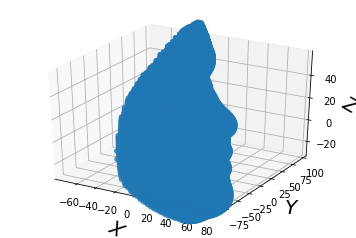

In [31]:
plot_3d_coords(x_train_np[2])

### Plot of the recovered face from the transformed data using principal components  

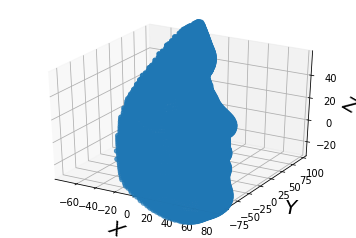

In [32]:
plot_3d_coords(x_train_np_trf[2])

## Average 3D Face
 <a id='avg_face'> </a>
 
 * Average face of the dataset is visualized here.

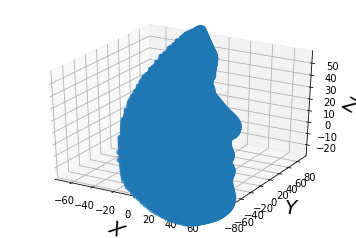

In [54]:
plot_3d_coords(v3d_avg)

In [34]:
# v3d_avg, np.array([pca.mean_ for pca in pca_v3d]).transpose(1, 0)

## Dominant Modes of Shape Variation
<a id='shape_variation'> </a>

 * To capture at least 98% of variability in the data, Principal Component Analysis (PCA) dimensionality reduction algorithm is used. 
 
 * Only 38 principal components (PCs) are needed to capture 98% variability in data.
 
 * With PCs one can generate any number of faces by varying the magnitude along a eigenfaces as given in following equation:

$$\mathit{x} \ = \  \bar{X}  + \sum_{i=1}^{K} b_{i} \mathbf{u}_{i}$$


 * where $\mathit{x}$ is a new face which is generated using $k$, eigenfaces ($u_{i}$) by varying the magnitude of $b_{i}$. 
 
 
 * For the sake of simplicity it is assumed that the distribution of $b_{i}$ is Gaussian (with mean $\sqrt{\lambda_i}$, and the variance 1) and are independent, thus varying its value within three standard deviation ($ -3 \sqrt{\lambda_{i}} \le b_{i} \le 3 \sqrt{\lambda_{i}} $) i.e. squre root of corresponding eigenvalue for the eigenfaces ($\mathbf{u}_{i}$)- can capture more than 99% of possible variations in shapes. 

 * In the following cells- plots have provided varying the value of $b_{i}$ up three std to generate faces using top 1, top 2, and all of the eigenfaces. 


In [35]:
print(x_train_np.shape, v3d_avg.shape)
mean_model = v3d_avg # x_train_np

(500, 7160, 3) (7160, 3)


In [36]:
import pdb
# pca_v3d_98.components_.reshape(pca_v3d_98.components_.shape[0], -1, 3), pca_v3d_98.mean_.reshape(-1, 3) # 
def compute_dominant_shapes(pca, npc=None, std_shift=1):
    # npc=None: use all ev i.e. principal components
    # std_shift: amount by which the images will be shifted
      

    # pca_v3d[0].components_.T[:, :10].shape    # 

        # pdb.set_trace()
        
    std = np.sqrt(pca.explained_variance_[:npc])
    shape = pca.mean_ + np.dot(pca.components_.T[:, :npc], std_shift * std)
    shape = shape.reshape(-1, 3) # (21480) => (7160, 3)
    
    return shape
    


In [37]:
t = compute_dominant_shapes(pca_v3d_98, 1)

In [38]:

def plot_3d_multifaces(data, rows=3, cols=3):
    
    fig = plt.figure()
    
    # fig, axes = plt.subplots(nrows=2, ncols=2)

    k = 0
    for i in range(1, rows+1):
        for j in range(1, cols+1):
            k += 1
            # print(f' i = {i}, j ={j}, k = {k}')
            # ax = plt.axes(projection="3d")
            ax = fig.add_subplot(rows, cols, k, projection='3d')
            
            datum = data[i-1, j-1]
            x, y, z = datum[:, 0], datum[:, 1], datum[:, 2]


            ax.scatter3D(x, y, z, zdir='x'); # ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');
            
            # ax.scatter3D(x_r, y_r, z_r, zdir='x', c="limegreen");
            # ax.plot_wireframe(x, y, z, rstride=10, cstride=10)
            
            ax.set_xlabel('$X$', fontsize=10, rotation=150)
            ax.set_ylabel('$Y$', fontsize=10)
            ax.set_zlabel('$Z$', fontsize=10, rotation=150)
            # plt.show()
    fig.tight_layout()
    # fig.subplots_adjust(left=0.6, bottom=0.6, right=1, top=1, hspace=1, wspace=1)
    
    # plt.subplots(2, 3, sharex='col', sharey='row')
    plt.show()


In [39]:
# min_pc = min([pca.n_components_ for pca in pca_v3d])
# pca_ef = [pca.mean_ + pca.components_[:min_pc, :] for pca in pca_v3d] # plot_3d_coords(np.array(t).transpose(1, 2, 0)[0])

# pca_ef_np = np.array(pca_ef).transpose(1, 2, 0)
# plot_3d_multifaces(pca_ef_np[:9].reshape(3, 3, 7160, 3))

In [40]:
pca_v3d_98.components_.shape

(38, 21480)

### Dominant Modes of Variation 
<a id='dom_var'> </a>

 * Top 9 modes of variabtion is shown here in decreasing order.  

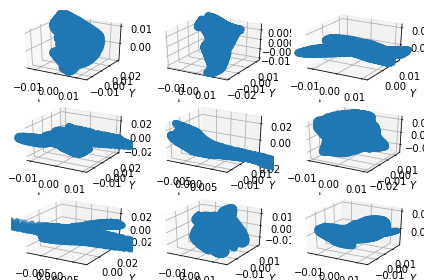

In [41]:
# plot_3d_multifaces(pca_ef_only_np[:9].reshape(3, 3, 7160, 3))
# Get only top 9 variations
pca_ef_only = pca_v3d_98.components_.reshape(pca_v3d_98.components_.shape[0], -1, 3)[:9].reshape(3, 3, -1, 3)
plot_3d_multifaces(pca_ef_only)

In [42]:
# fig = plt.figure()
# fig.subplots_adjust?
pca_ef_only[0, 0]

array([[ 0.01174451, -0.00198769,  0.00942324],
       [ 0.01182507, -0.00157514,  0.00946644],
       [ 0.01189917, -0.00116833,  0.00950844],
       ..., 
       [-0.01165194, -0.00125941,  0.00948002],
       [-0.01158445, -0.00166082,  0.00943674],
       [-0.01151136, -0.00206809,  0.00938812]])

## Generating faces using variable combination of eigenfaces

 * Using top one eigenface
 
 * Using top two eigenfaces
 
 * Using all eigenfaces

In [43]:
pca_v3d_98.components_.shape

(38, 21480)

In [44]:
t0 = compute_dominant_shapes(pca_v3d_98, 1, 0)#  == pca_v3d_98.mean_.reshape(-1, 3) == v3d_avg
t1 = compute_dominant_shapes(pca_v3d_98, 1, 1)



In [45]:
# t0, t1

## Using top one eigenfaces

In [46]:

std1_extrms_1 = [compute_dominant_shapes(pca_v3d_98, npc=1, std_shift=std_shift) for std_shift in [-1, 0, 1]]
std2_extrms_1 = [compute_dominant_shapes(pca_v3d_98, npc=1, std_shift=std_shift) for std_shift in [-2, 0, 2]] 
std3_extrms_1 = [compute_dominant_shapes(pca_v3d_98, npc=1, std_shift=std_shift) for std_shift in [-3, 0, 3]] 

In [47]:
# std1_extrms_1, std2_extrms_1, std3_extrms_1

In [48]:
# plot_3d_multifaces(np.expand_dims(np.array(std3_extrms_1), axis=1), rows=3, cols=1)

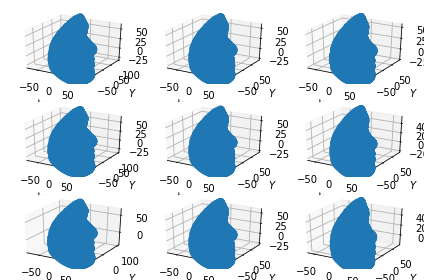

In [49]:
# sum(std1_extrms_1[1] == x_train_np.mean(axis=0))
# plot_3d_multifaces(np.expand_dims(np.array(std1_extrms_1), axis=1), rows=3, cols=3)
plot_3d_multifaces(np.array([std1_extrms_1, std2_extrms_1, std3_extrms_1]), rows=3, cols=3)

## Using top two eigenfaces

In [50]:
std1_extrms_2 = [compute_dominant_shapes(pca_v3d_98, npc=2, std_shift=std_shift) for std_shift in [-1, 0, 1]]
std2_extrms_2 = [compute_dominant_shapes(pca_v3d_98, npc=2, std_shift=std_shift) for std_shift in [-2, 0, 2]] 
std3_extrms_2 = [compute_dominant_shapes(pca_v3d_98, npc=2, std_shift=std_shift) for std_shift in [-3, 0, 3]]

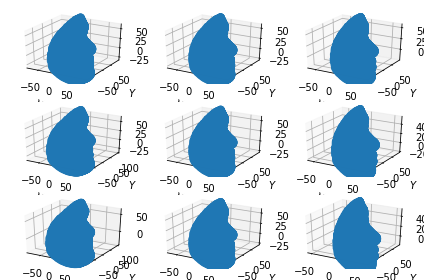

In [51]:
plot_3d_multifaces(np.array([std1_extrms_2, std2_extrms_2, std3_extrms_2]), rows=3, cols=3)

## Using all the eigenfaces

 * That captures 98% of variability in the data

In [52]:
# All 98% PC/98% PC

std1_extrms_all = [compute_dominant_shapes(pca_v3d_98, npc=None, std_shift=std_shift) for std_shift in [-1, 0, 1]]
std2_extrms_all = [compute_dominant_shapes(pca_v3d_98, npc=None, std_shift=std_shift) for std_shift in [-2, 0, 2]] 
std3_extrms_all = [compute_dominant_shapes(pca_v3d_98, npc=None, std_shift=std_shift) for std_shift in [-3, 0, 3]]

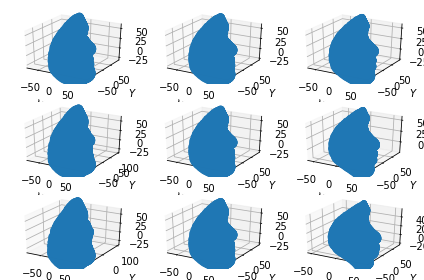

In [53]:
plot_3d_multifaces(np.array([std1_extrms_all, std2_extrms_all, std3_extrms_all]), rows=3, cols=3)

## Conclusion
<a id='conclusion'> </a>

 * Eigenfaces from the PCA analysis gives idea about the [dominant](#dom_var) variability in data.
 
 * In this notebook we also observed variability in generated faces using merely few numbers of eigenfaces (38) that captures 98-99% of data (500 faces). 
 
 * Here the emphasis is on capturing overall 3D face variability, rather than texture which is best captured using landmark points.
 

## References
<a id='references'> </a>

 [1] White, Julie D., et al. "MeshMonk: Open-source large-scale intensive 3D phenotyping." Scientific reports 9.1 (2019): 1-11.

 [2] Cootes, Tim, E. R. Baldock, and J. Graham. "An introduction to active shape models." Image processing and analysis (2000): 223-248.